In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification 

 96% 333M/346M [00:01<00:00, 285MB/s]
100% 346M/346M [00:01<00:00, 266MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import os , cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten ,Dense,Input,Dropout,BatchNormalization


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/seg_train/seg_train",
    labels = 'inferred',
    label_mode = 'categorical',#it can be set to binary also but in this case it is more than two
    batch_size = 32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/seg_test/seg_test",
    labels = 'inferred',
    label_mode = 'categorical',#it can be set to binary also but in this case it is more than two
    batch_size = 32,
    image_size=(256,256)
    )


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image ,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#cnn model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(12, activation="softmax"))
model.add(Dropout(0.3))
model.add(Dense(6, activation="softmax"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs= 15,validation_data=validation_ds)  

Epoch 1/15
439/439 [==============================] - 59s 112ms/step - loss: 9.1266 - accuracy: 0.5701 - val_loss: 9.4272 - val_accuracy: 0.4100
Epoch 2/15
439/439 [==============================] - 48s 110ms/step - loss: 5.6181 - accuracy: 0.6855 - val_loss: 6.4366 - val_accuracy: 0.6880
Epoch 3/15
439/439 [==============================] - 48s 108ms/step - loss: 4.0390 - accuracy: 0.7420 - val_loss: 5.8816 - val_accuracy: 0.5990
Epoch 4/15
439/439 [==============================] - 48s 109ms/step - loss: 2.5365 - accuracy: 0.7904 - val_loss: 7.5089 - val_accuracy: 0.5380
Epoch 5/15
439/439 [==============================] - 48s 108ms/step - loss: 1.5960 - accuracy: 0.8196 - val_loss: 3.2333 - val_accuracy: 0.6773
Epoch 6/15
439/439 [==============================] - 48s 109ms/step - loss: 0.8912 - accuracy: 0.8669 - val_loss: 2.4154 - val_accuracy: 0.7450
Epoch 7/15
439/439 [==============================] - 48s 108ms/step - loss: 0.5623 - accuracy: 0.8954 - val_loss: 2.7112 - val_ac

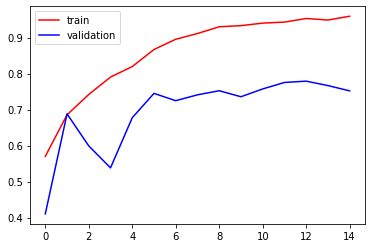

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show() 

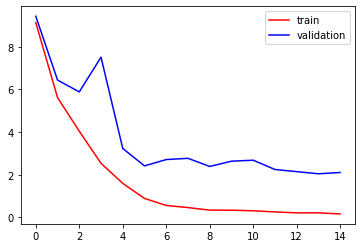

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_img = cv2.imread('/content/istockphoto-467367026-612x612.jpg')

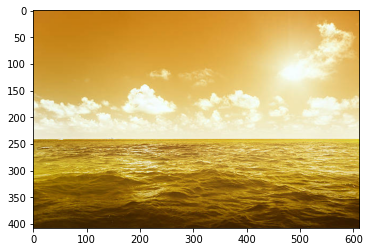

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(408, 612, 3)

In [ ]:
test_img_scale=cv2.resize(test_img,(256,256))

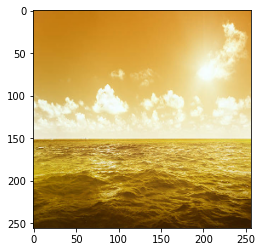

In [ ]:
plt.imshow(test_img_scale)

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3))

In [ ]:
model.predict(test_input) 

1/1 [==============================] - 0s 17ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 17ms/step


1